  Project:Loan Eligibility Prediction


In [ ]:
import numpy as np
import pandas as pd


In [2]:

loan_train = pd.read_csv('loan-train.csv')
loan_test = pd.read_csv('loan-test.csv')

In [3]:
loan_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Preprocessing the Data Set

In [5]:
# list of how many null values are present per column
loan_train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:
loan_test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [7]:
#remove duplicates rows
loan_train.drop_duplicates(inplace=True)

In [ ]:
print("Number of rows: ",len(loan_train))

Number of rows:  614


In [8]:
print("Number of columns: ",len(loan_train.columns))

Number of columns:  13


In [9]:
loan_train.shape

(614, 13)

In [10]:
loan_test.shape

(367, 12)

In [11]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
conert_dict={
    'ApplicantIncome': np.float16,
    'CoapplicantIncome': np.float16 ,
    'LoanAmount' : np.float16 ,
    'Loan_Amount_Term' : np.float16 ,
    'Credit_History'  : np.float16
}
loan_train=loan_train.astype(conert_dict)
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float16
 7   CoapplicantIncome  614 non-null    float16
 8   LoanAmount         592 non-null    float16
 9   Loan_Amount_Term   600 non-null    float16
 10  Credit_History     564 non-null    float16
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float16(5), object(8)
memory usage: 44.5+ KB


/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [14]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float16
 7   CoapplicantIncome  614 non-null    float16
 8   LoanAmount         592 non-null    float16
 9   Loan_Amount_Term   600 non-null    float16
 10  Credit_History     564 non-null    float16
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float16(5), object(8)
memory usage: 44.5+ KB


In [15]:
conert_dict={
    'ApplicantIncome': np.float16,
    'CoapplicantIncome': np.float16 ,
    'LoanAmount' : np.float16 ,
    'Loan_Amount_Term' : np.float16 ,
    'Credit_History'  : np.float16
}
loan_test=loan_test.astype(conert_dict)
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float16
 7   CoapplicantIncome  614 non-null    float16
 8   LoanAmount         592 non-null    float16
 9   Loan_Amount_Term   600 non-null    float16
 10  Credit_History     564 non-null    float16
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float16(5), object(8)
memory usage: 44.5+ KB


/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [16]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    float16
 7   CoapplicantIncome  367 non-null    float16
 8   LoanAmount         362 non-null    float16
 9   Loan_Amount_Term   361 non-null    float16
 10  Credit_History     338 non-null    float16
 11  Property_Area      367 non-null    object 
dtypes: float16(5), object(7)
memory usage: 23.8+ KB


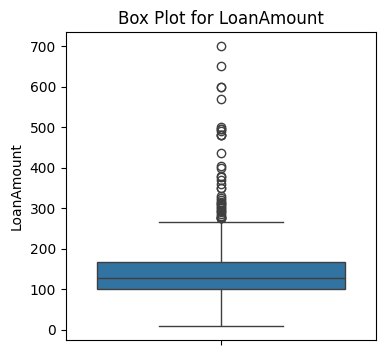

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))
sns.boxplot(data=loan_train,y='LoanAmount')
plt.title('Box Plot for LoanAmount')
plt.show()

In [18]:
q1, q3 = loan_train['LoanAmount'].quantile([0.25, 0.75])
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

lower_limit,upper_limit

(-2.0, 270.0)

In [19]:
loan_train=loan_train[loan_train['LoanAmount']<upper_limit]
loan_train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4584.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2584.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5416.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4104.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7584.0,0.0,187.0,360.0,1.0,Urban,Y


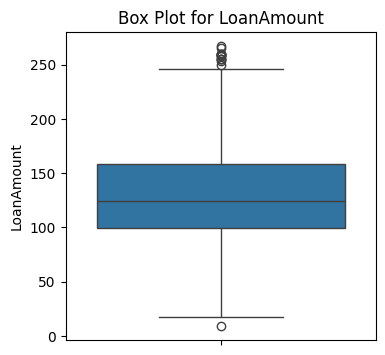

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))
sns.boxplot(data=loan_train,y='LoanAmount')
plt.title('Box Plot for LoanAmount')
plt.show()

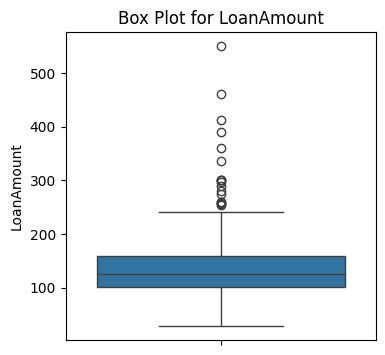

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))
sns.boxplot(data=loan_test,y='LoanAmount')
plt.title('Box Plot for LoanAmount')
plt.show()

In [22]:
loan_test['LoanAmount'].describe()

,LoanAmount
count,362.000
mean,136.125
std,61.375
min,28.000
25%,100.250
50%,125.000
75%,158.000
max,550.000


In [23]:
q1, q3 = loan_test['LoanAmount'].quantile([0.25, 0.75])
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

lower_limit,upper_limit

(13.625, 244.625)

In [ ]:
loan_test=loan_train[loan_train['LoanAmount']<upper_limit]
loan_test

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4584.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2584.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2332.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4104.0,0.0,40.0,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7584.0,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
loan_train['Loan_Amount_Term'].describe()

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Loan_Amount_Term
count,539.000
mean,inf
std,65.875
min,12.000
25%,360.000
50%,360.000
75%,360.000
max,480.000


In [25]:
# We need to fill null values of Numerical Data with mean and mode



loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])
loan_test['Credit_History'] = loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0])


loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0])
loan_test['Loan_Amount_Term'] = loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0])


loan_train['LoanAmount'] = loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean())
loan_test['LoanAmount'] = loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean())

for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    loan_train[col] = loan_train[col].fillna(loan_train[col].mode()[0])
    loan_test[col] = loan_test[col].fillna(loan_test[col].mode()[0])


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [26]:
loan_train.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [27]:
loan_test.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [28]:
# Removing Unnecessary Features

loan_train = loan_train.drop('Loan_ID',axis=1)
loan_train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4584.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2584.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5416.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4104.0,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7584.0,0.0,187.0,360.0,1.0,Urban,Y


Data Visualizations

In [29]:
# Importing necessary libraries..
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

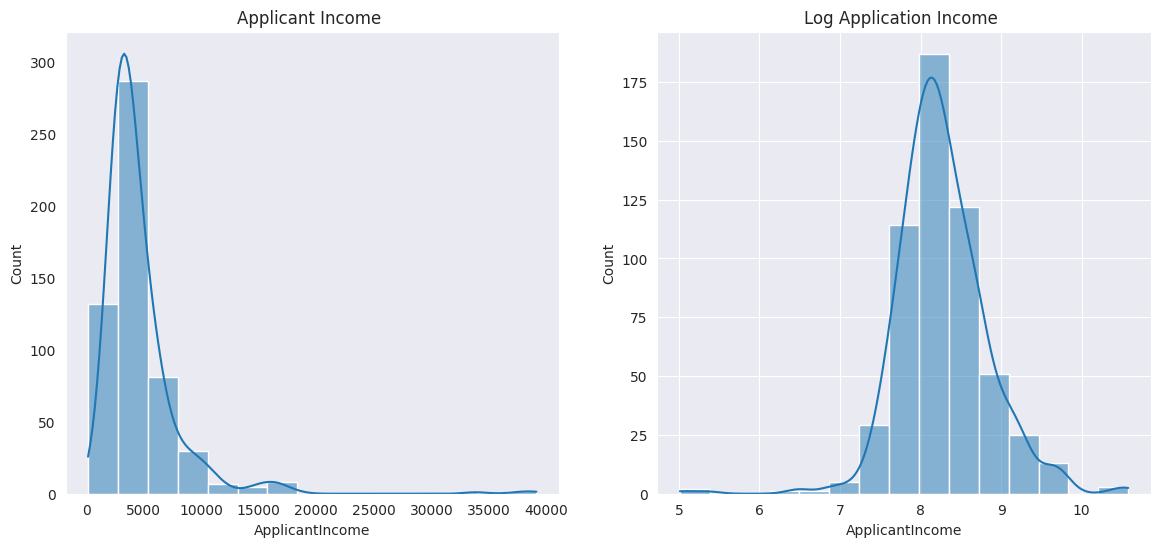

In [30]:
#Normalization of ApplicantIncome to remove skweness
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)


sns.histplot(loan_train['ApplicantIncome'],bins=15,kde=True)
plt.title("Applicant Income ")

plt.subplot(1, 2, 2)
plt.grid()
loan_train['ApplicantIncome']=np.log(loan_train['ApplicantIncome'])
sns.histplot(loan_train['ApplicantIncome'],bins=15,kde=True)
plt.title("Log Application Income ")

plt.show()

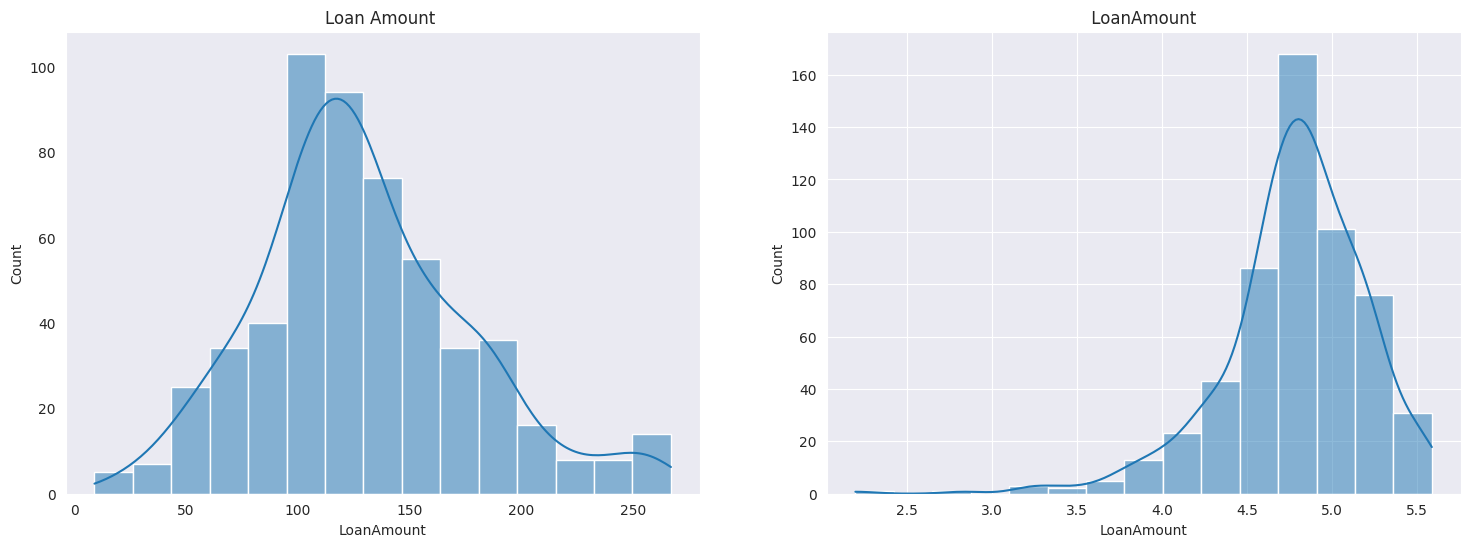

In [31]:
#Normalization of LoanAmount to remove skweness
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


sns.histplot(loan_train['LoanAmount'],bins=15,kde=True)
plt.title("Loan Amount ")

plt.subplot(1, 2, 2)
plt.grid()
loan_train['LoanAmount']=np.log(loan_train['LoanAmount'])
sns.histplot(loan_train['LoanAmount'],bins=15,kde=True)
plt.title(" LoanAmount ")

plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


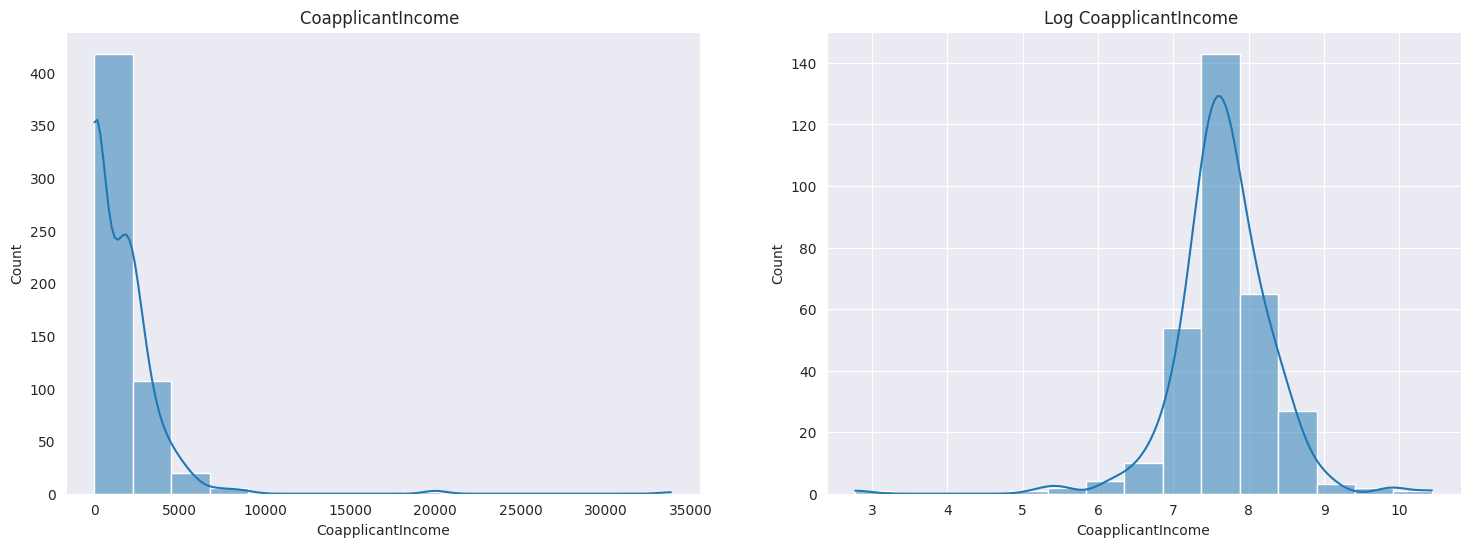

In [32]:
#Normalization of CoapplicantIncome to remove skweness
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


sns.histplot(loan_train['CoapplicantIncome'],bins=15,kde=True)
plt.title("CoapplicantIncome ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(np.log(loan_train['CoapplicantIncome']),bins=15,kde=True)
plt.title("Log CoapplicantIncome ")

plt.show()

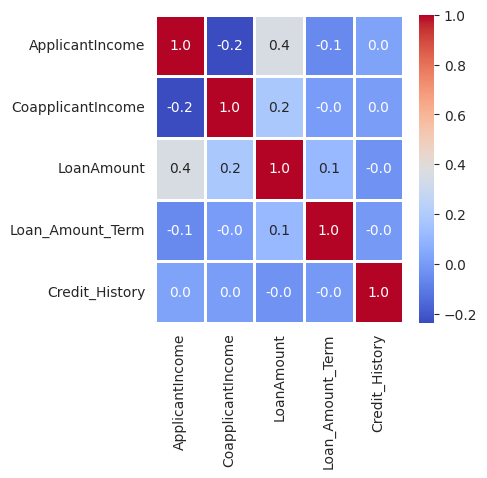

In [33]:
num_cols = loan_train.select_dtypes(exclude='object')
plt.figure(figsize=(4,4))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=1)
plt.show()


In [34]:
print("Covariance of numeric columns:")
print(num_cols.cov())

Covariance of numeric columns:
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           0.312678      -3.154847e+02    0.083767   
CoapplicantIncome      -315.484702       5.654867e+06  180.330393   
LoanAmount                0.083767       1.803304e+02    0.180033   
Loan_Amount_Term         -1.992477      -2.770277e+01    3.167051   
Credit_History            0.005071       4.269325e+00   -0.004161   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -1.992477        0.005071  
CoapplicantIncome        -27.702768        4.269325  
LoanAmount                 3.167051       -0.004161  
Loan_Amount_Term        4234.611212       -0.124617  
Credit_History            -0.124617        0.123962  


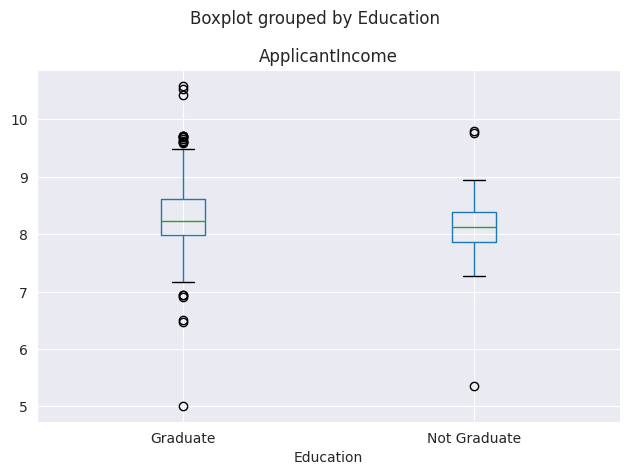

In [35]:
loan_train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

Split into Train and Test

In [36]:
X = loan_train.iloc[:,:-1]
y = loan_train['Loan_Status']

In [37]:
X = pd.get_dummies(X)
loan_train = pd.get_dummies(loan_train)
loan_test = pd.get_dummies(loan_test)

In [39]:
# Splitting the data set into train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [41]:
np.isfinite(X_train).sum()

,0
ApplicantIncome,442
CoapplicantIncome,442
LoanAmount,442
Loan_Amount_Term,442
Credit_History,442
Gender_Female,442
Gender_Male,442
Married_No,442
Married_Yes,442
Dependents_0,442


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 20 to 115
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          442 non-null    float16
 1   CoapplicantIncome        442 non-null    float16
 2   LoanAmount               442 non-null    float16
 3   Loan_Amount_Term         442 non-null    float16
 4   Credit_History           442 non-null    float16
 5   Gender_Female            442 non-null    bool   
 6   Gender_Male              442 non-null    bool   
 7   Married_No               442 non-null    bool   
 8   Married_Yes              442 non-null    bool   
 9   Dependents_0             442 non-null    bool   
 10  Dependents_1             442 non-null    bool   
 11  Dependents_2             442 non-null    bool   
 12  Dependents_3+            442 non-null    bool   
 13  Education_Graduate       442 non-null    bool   
 14  Education_Not Graduate   442 n

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=500)
model_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [44]:
model_1_prediction=model_1.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(classification_report(y_test, model_1_prediction))

              precision    recall  f1-score   support

           N       0.89      0.46      0.60        35
           Y       0.80      0.97      0.88        76

    accuracy                           0.81       111
   macro avg       0.84      0.72      0.74       111
weighted avg       0.83      0.81      0.79       111



In [46]:
cm = confusion_matrix(y_test, model_1_prediction)
print(cm)

[[16 19]
 [ 2 74]]


In [47]:
print(accuracy_score(y_test, model_1_prediction))
acc1 = accuracy_score(y_test, model_1_prediction)

0.8108108108108109


In [48]:
model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
model_2_prediction=model_2.predict(X_test)

In [50]:
print(classification_report(y_test, model_2_prediction))

              precision    recall  f1-score   support

           N       0.80      0.46      0.58        35
           Y       0.79      0.95      0.86        76

    accuracy                           0.79       111
   macro avg       0.80      0.70      0.72       111
weighted avg       0.79      0.79      0.77       111



In [51]:
cm = confusion_matrix(y_test, model_2_prediction)
print(cm)

[[16 19]
 [ 4 72]]


In [52]:
print(accuracy_score(y_test, model_2_prediction))
acc2 = accuracy_score(y_test, model_2_prediction)

0.7927927927927928


In [53]:
model_3 = RandomForestClassifier(n_estimators=1000)
model_3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [54]:
model_3_prediction=model_3.predict(X_test)

In [55]:
cm = confusion_matrix(y_test, model_3_prediction)
print(cm)

[[16 19]
 [ 3 73]]


In [ ]:
print(accuracy_score(y_test, model_3_prediction))
acc3 = accuracy_score(y_test, model_3_prediction)

0.8018018018018018


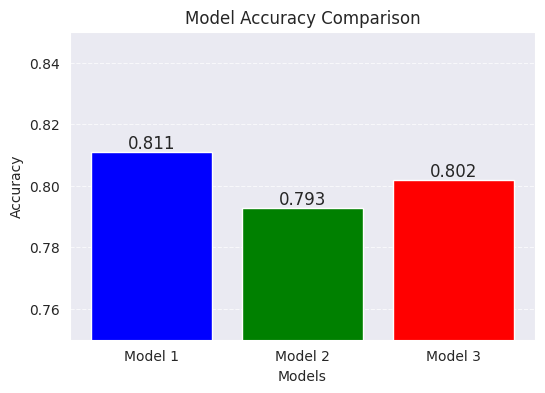

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracy scores
acc1 = accuracy_score(y_test, model_1_prediction)
acc2 = accuracy_score(y_test, model_2_prediction)
acc3 = accuracy_score(y_test, model_3_prediction)



# Plot accuracy comparison
models = ['Model 1', 'Model 2', 'Model 3']
accuracy = [acc1, acc2, acc3]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red'])

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():.3f}", ha='center', va='bottom', fontsize=12)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.85)  # Adjust y-axis for better differentiation
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [57]:
from sklearn import svm

model_4=svm.SVC(kernel='linear')
model_4.fit(X_train,y_train)

SVC(kernel='linear')

In [58]:
model_4_prediction=model_4.predict(X_test)
print(classification_report(y_test,model_4_prediction))

              precision    recall  f1-score   support

           N       1.00      0.46      0.63        35
           Y       0.80      1.00      0.89        76

    accuracy                           0.83       111
   macro avg       0.90      0.73      0.76       111
weighted avg       0.86      0.83      0.81       111



In [59]:
cm = confusion_matrix(y_test, model_4_prediction)
print(cm)

[[16 19]
 [ 0 76]]


In [60]:
print(accuracy_score(y_test, model_4_prediction))

0.8288288288288288


In [61]:
model_5=svm.SVC(kernel='rbf')
model_5.fit(X_train,y_train)

SVC()

In [62]:
model_5_prediction=model_5.predict(X_test)
print(classification_report(y_test,model_5_prediction))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        35
           Y       0.68      1.00      0.81        76

    accuracy                           0.68       111
   macro avg       0.34      0.50      0.41       111
weighted avg       0.47      0.68      0.56       111



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
cm = confusion_matrix(y_test, model_5_prediction)
print(cm)

[[ 0 35]
 [ 0 76]]


In [64]:
print(accuracy_score(y_test, model_5_prediction))

0.6846846846846847


In [65]:
from sklearn import svm

model_6 = svm.SVC(kernel='sigmoid')
model_6.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [66]:
model_6_prediction=model_6.predict(X_test)
print(classification_report(y_test,model_6_prediction))

              precision    recall  f1-score   support

           N       0.50      0.17      0.26        35
           Y       0.71      0.92      0.80        76

    accuracy                           0.68       111
   macro avg       0.60      0.55      0.53       111
weighted avg       0.64      0.68      0.63       111



In [67]:
cm = confusion_matrix(y_test, model_6_prediction)
print(cm)

[[ 6 29]
 [ 6 70]]


In [68]:
print(accuracy_score(y_test, model_6_prediction))

0.6846846846846847


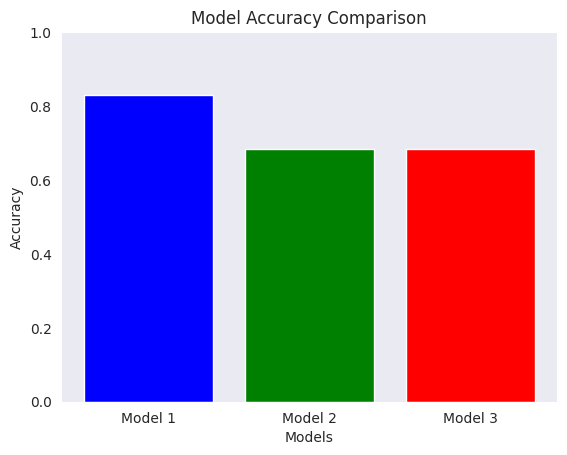

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracy scores
acc1 = accuracy_score(y_test, model_4_prediction)
acc2 = accuracy_score(y_test, model_5_prediction)
acc3 = accuracy_score(y_test, model_6_prediction)



# Plot accuracy comparison
models = ['Model 1', 'Model 2', 'Model 3']
accuracy = [acc1, acc2, acc3]

plt.bar(models, accuracy, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set limit for better visibility
plt.title('Model Accuracy Comparison')
plt.show()